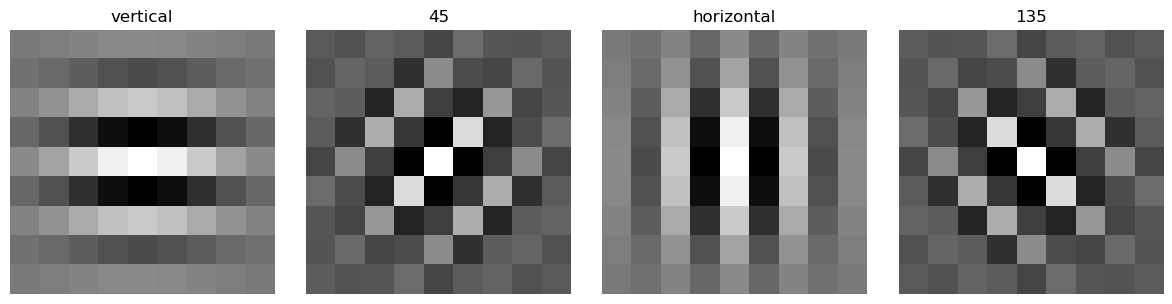

1.0 -0.8824969025845955 0.0017236887995541405


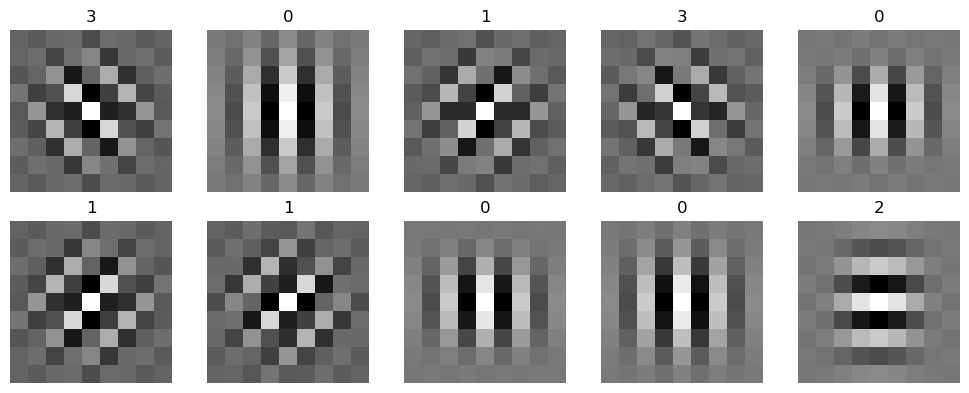

In [1]:
import numpy as np

def gabor_like(size=9, theta=0.0, sigma=2.0, freq=0.5, phase=0.0):
    ax = np.arange(-(size//2), size//2 + 1)
    xx, yy = np.meshgrid(ax, ax)
    x_theta = xx * np.cos(theta) + yy * np.sin(theta)
    y_theta = -xx * np.sin(theta) + yy * np.cos(theta)
    gauss = np.exp(-(x_theta**2 + y_theta**2) / (2 * sigma**2))
    sinusoid = np.cos(2 * np.pi * freq * x_theta + phase)
    gabor = gauss * sinusoid
    return gabor

angles = {
    "vertical": np.deg2rad(90),
    "45": np.deg2rad(45),
    "horizontal": np.deg2rad(0),
    "135": np.deg2rad(135),
}

gabor_filters = {name: gabor_like(theta=ang) for name, ang in angles.items()}

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(gabor_filters), figsize=(12, 3))
for ax, (name, kernel) in zip(axes, gabor_filters.items()):
    ax.imshow(kernel, cmap="gray", interpolation="nearest")
    ax.set_title(name)
    ax.axis("off")
plt.tight_layout()
plt.show()

n_samples = 1000
labels = {"horizontal": 0, "45": 1, "vertical": 2, "135": 3}
angle_names = list(labels.keys())

X = []
y = []

for _ in range(n_samples):
    name = np.random.choice(angle_names)
    base_angle = angles[name]
    delta = np.deg2rad(np.random.uniform(-10, 10))
    kernel = gabor_like(theta=base_angle + delta)
    X.append(kernel)
    y.append(labels[name])

X = np.stack(X, axis=0)
y = np.array(y, dtype=int)

print(X.max(), X.min(), X.mean())

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for ax, img, label in zip(axes.ravel(), X[:10], y[:10]):
    ax.imshow(img, cmap="gray", interpolation="nearest")
    ax.set_title(str(label))
    ax.axis("off")
plt.tight_layout()
plt.show()

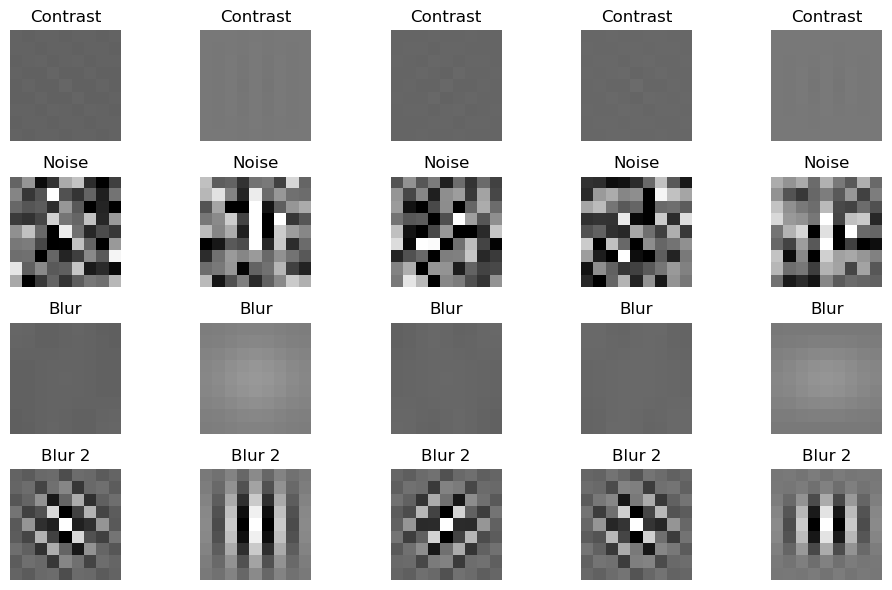

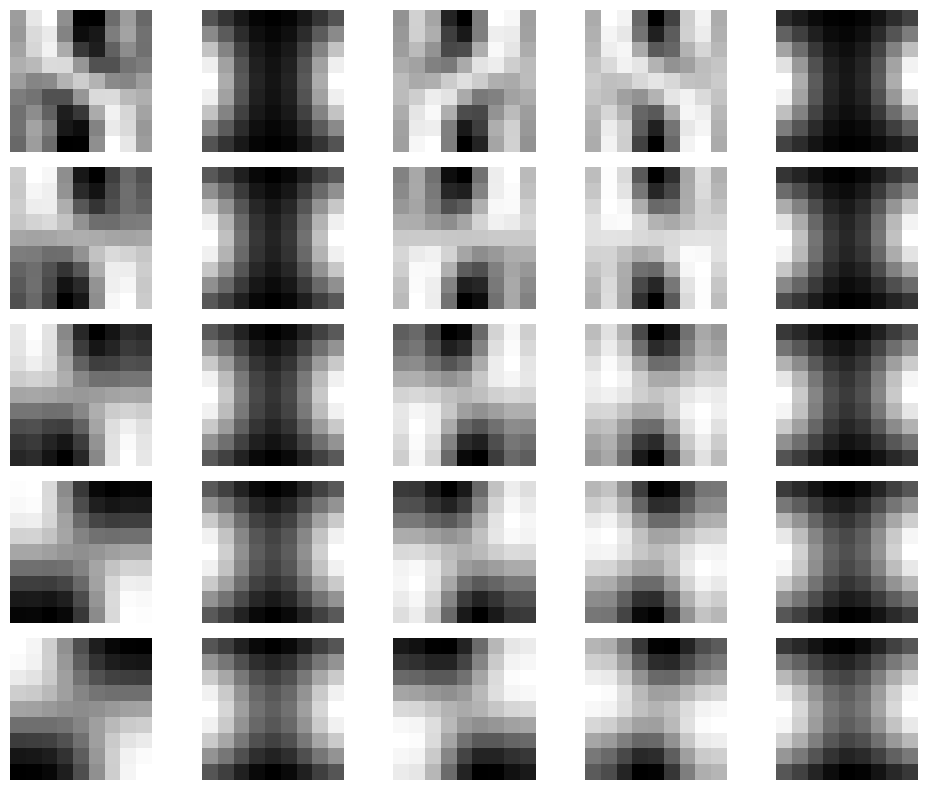

In [2]:
from distortion import contrast_alpha, add_gaussian_noise, blur_beta_resample,blur_beta_resample_2,blur_beta_pool,GaussianBlur
import torch
samples = torch.from_numpy(X[:5]).float()*20

contrast = contrast_alpha(alpha=0.02)
noise = add_gaussian_noise(sigma=1.4)
blur = blur_beta_resample(beta=1)
blur_2 = blur_beta_resample_2(beta=0)

distorted_contrast = contrast(samples)
distorted_noise = noise(samples)
distorted_blur = blur(samples)
distorted_blur_2 = blur_2(samples)


fig, axes = plt.subplots(4, 5, figsize=(10, 6))
for i in range(5):
    vmin = min(
        distorted_contrast[i].min(),
        distorted_blur[i].min(),
        distorted_blur_2[i].min(),
    )
    vmax = max(
        distorted_contrast[i].max(),
        distorted_blur[i].max(),
        distorted_blur_2[i].max(),
    )
    axes[0, i].imshow(distorted_contrast[i], cmap="gray", interpolation="nearest", vmin=vmin, vmax=vmax)
    axes[0, i].set_title("Contrast")
    axes[0, i].axis("off")
    
    axes[1, i].imshow(distorted_noise[i], cmap="gray", interpolation="nearest", vmin=vmin, vmax=vmax)
    axes[1, i].set_title("Noise")
    axes[1, i].axis("off")
    
    axes[2, i].imshow(distorted_blur[i], cmap="gray", interpolation="nearest", vmin=vmin, vmax=vmax)
    axes[2, i].set_title("Blur")
    axes[2, i].axis("off")

    axes[3, i].imshow(distorted_blur_2[i], cmap="gray", interpolation="nearest", vmin=vmin, vmax=vmax)
    axes[3, i].set_title("Blur 2")
    axes[3, i].axis("off")

plt.tight_layout()
plt.show()

betas = [2,2.25,2.5,2.75,3]
blurred_sets = [GaussianBlur(sigma=b)(samples) for b in betas]

fig, axes = plt.subplots(len(betas), samples.shape[0], figsize=(10, 8))
for r, beta in enumerate(betas):
    for c in range(samples.shape[0]):
        axes[r, c].imshow(blurred_sets[r][c], cmap="gray")
        if c == 0:
            axes[r, c].set_ylabel(f"beta={beta}")
        axes[r, c].axis("off")
plt.tight_layout()
plt.show()